In [1]:
import pandas as pd

v = pd.read_csv("V.csv")
ma = pd.read_csv("MA.csv")

v["date"] = pd.to_datetime(v["date"])
ma["date"] = pd.to_datetime(ma["Date"].str.slice(0, 10))

v = v[["date", "close"]]
v = v.rename(columns={"close": "V"})
v["V"] = pd.to_numeric(v["V"], errors="coerce")

ma = ma[["date", "Close"]]
ma = ma.rename(columns={"Close": "MA"})
ma["MA"] = pd.to_numeric(ma["MA"], errors="coerce")

visa_mastersclose = pd.merge(v, ma, on="date", how="inner")
visa_mastersclose = visa_mastersclose.set_index("date").sort_index()
visa_mastersclose = visa_mastersclose.loc["2016-01-01": "2024-06-01"]

visa_mastersclose.to_csv("visa_mastersclose.csv")
print(visa_mastersclose.dtypes)

V     float64
MA    float64
dtype: object


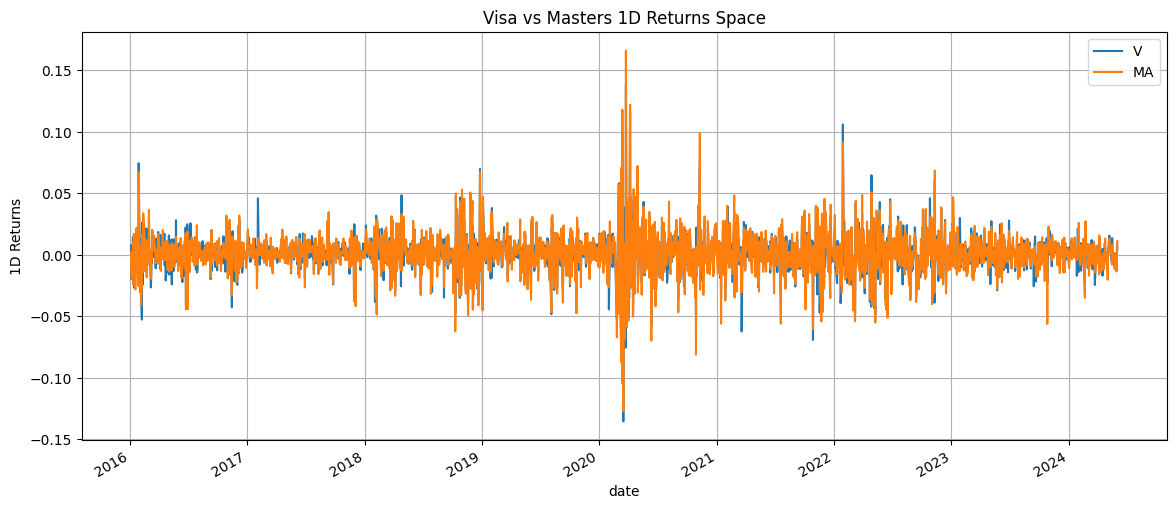

In [ ]:
import matplotlib.pyplot as plt 

visa_masters_rets = visa_mastersclose.pct_change()
visa_masters_rets.plot(grid=True, figsize=(14, 6))
plt.title('Visa vs Masters 1D Returns Space')
plt.ylabel('1D Returns')
plt.show()